In [1]:
import numpy as np
import pandas as pd

df = pd.read_excel("C:\\Users\\happy\\Documents\\University\\Semester5\\DataPython\\Material\\Lab4\\En_In.xls",
                   header = None, usecols = 'C:F', skiprows = 18, nrows=227,
                   names = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'])
df #1

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321,10,78.669280
1,Albania,102,35,100.000000
2,Algeria,1959,51,0.551010
3,American Samoa,...,...,0.641026
4,Andorra,9,121,88.695650
...,...,...,...,...
222,Viet Nam,2554,28,45.321520
223,Wallis and Futuna Islands,0,26,0.000000
224,Yemen,344,13,0.000000
225,Zambia,400,26,99.714670


In [2]:
df['Energy Supply'] = pd.to_numeric(df['Energy Supply'].apply(lambda x: x * 1000000), errors='coerce')
df['Energy Supply per Capita'] = pd.to_numeric(df['Energy Supply per Capita'], errors='coerce')
df['% Renewable'] = pd.to_numeric(df['% Renewable'], errors='coerce')
df #2

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10.0,78.669280
1,Albania,1.020000e+08,35.0,100.000000
2,Algeria,1.959000e+09,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.000000e+06,121.0,88.695650
...,...,...,...,...
222,Viet Nam,2.554000e+09,28.0,45.321520
223,Wallis and Futuna Islands,0.000000e+00,26.0,0.000000
224,Yemen,3.440000e+08,13.0,0.000000
225,Zambia,4.000000e+08,26.0,99.714670


In [3]:
df['Country'] = df['Country'].replace(r' *([0-9]+|(\(.*\))) *', '', regex=True)
df.loc[df['Country'].isin(['American Samoa', 'Republic of Korea', 'Bolivia'])] #4

,Country,Energy Supply,Energy Supply per Capita,% Renewable
3,American Samoa,NaN,NaN,0.641026
24,Bolivia,3.360000e+08,32.0,31.477120
164,Republic of Korea,1.100700e+10,221.0,2.279353


In [4]:
df['Country'] = df['Country'].replace(to_replace = {
    'Republic of Korea' : 'South Korea',
    'United States of America' : 'United States',
    'United Kingdom of Great Britain and Northern Ireland' : 'United Kingdom',
    'China, Hong Kong Special Administrative Region' : 'Hong Kong'})
df.loc[df['Country'].isin(['South Korea', 'United States', 'United Kingdom', 'Hong Kong'])] #3

,Country,Energy Supply,Energy Supply per Capita,% Renewable
43,Hong Kong,5.850000e+08,82.0,0.000000
164,South Korea,1.100700e+10,221.0,2.279353
214,United Kingdom,7.920000e+09,124.0,10.600470
216,United States,9.083800e+10,286.0,11.570980


In [5]:
df.loc[df['Country'].isin(['American Samoa', 'South Korea', 'Bolivia'])] #1-4

,Country,Energy Supply,Energy Supply per Capita,% Renewable
3,American Samoa,NaN,NaN,0.641026
24,Bolivia,3.360000e+08,32.0,31.477120
164,South Korea,1.100700e+10,221.0,2.279353


In [6]:
gpd = pd.read_csv("C:\\Users\\happy\\Documents\\University\\Semester5\\DataPython\\Material\\Lab4\\gpd.csv", header=4)
gpd.rename(columns={'Country Name' : 'Country'}, inplace=True)
gpd['Country'] = gpd['Country'].replace(to_replace = {
    'Korea, Rep.' : 'South Korea',
    'Iran, Islamic Rep.' : 'Iran',
    'Hong Kong SAR, China' : 'Hong Kong'})
gpd.head(1) #5

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN


In [7]:
scimagojr = pd.read_excel("C:\\Users\\happy\\Documents\\University\\Semester5\\DataPython\\Material\\Lab4\\scimagojr.xlsx")
scimagojr #6

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57
...,...,...,...,...,...,...,...,...
186,187,Guyana,1,1,0,0,0.00,0
187,188,Christmas Island,1,1,0,0,0.00,0
188,189,Reunion,1,1,2,1,2.00,1
189,190,Saint Lucia,1,1,0,0,0.00,0


In [8]:
df = pd.merge(scimagojr[scimagojr['Rank'] <= 15], df, on='Country', how='left')
df = pd.merge(df, gpd[['Country', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']],
             on='Country', how='left')
df.set_index('Country', inplace=True)
df #7

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [9]:
def task_eight():
    avgGPD = df[['2006', '2007', '2008', '2009', '2010',
                 '2011', '2012', '2013', '2014', '2015']].mean(axis=1).sort_values(ascending=False).rename('avgGPD')
    return avgGPD.apply(lambda x: f"{x:.3f}")
task_eight() #8

Country
United States         15364344302990.000
China                  6348608932836.100
Japan                  5542207638235.176
Germany                3493025339072.848
France                 2681724635761.589
United Kingdom         2487906661418.417
Brazil                 2189794143774.905
Italy                  2120175089933.776
India                  1769297396603.860
Canada                 1660647466307.512
Russian Federation     1565459478480.661
Spain                  1418078278145.694
Australia              1164042729991.427
South Korea            1106714508244.852
Iran                    444155754051.095
Name: avgGPD, dtype: object

In [10]:
def task_nine():
    country = task_eight().index[4]
    return (country, df.loc[country, '2015'] - df.loc[country, '2006'])
task_nine() #9

('France', 153345695364.24023)

In [11]:
def task_ten():
    country = df[df['% Renewable'] == df['% Renewable'].max()].index[0]
    return (country, df.loc[country, '% Renewable'])
task_ten() #10

('Brazil', 69.64803)

In [12]:
def task_eleven():
    df['Population'] = df['Energy Supply'] / df['Energy Supply per Capita']
    country = df.sort_values(by='Population', ascending=False).index[5]
    return (country, df.loc[country, 'Population'])
task_eleven() #11

('Japan', 127409395.97315437)

In [14]:
def task_twelve():
    df['Citable documents per Capita'] = df['Citable documents'] / df['Population']
    return df['Citable documents per Capita'].corr(df['Energy Supply per Capita'])
task_twelve() #12

0.7940010435442946

In [14]:
def task_thirteen():
    df['Above Median'] = (df['% Renewable'] >= df['% Renewable'].median()).astype(int)
    return df.sort_values(by='Rank', ascending=True)['Above Median'].rename(None)
task_thirteen() #13

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
dtype: int32

In [15]:
ContinentDict = {'China': 'Asia', 'United States': 'North America',
                 'Japan': 'Asia', 'United Kingdom': 'Europe',
                 'Russian Federation': 'Europe', 'Canada': 'North America',
                 'Germany': 'Europe', 'India': 'Asia', 'France': 'Europe',
                 'South Korea': 'Asia', 'Italy': 'Europe', 'Spain': 'Europe',
                 'Iran': 'Asia', 'Australia': 'Australia', 'Brazil': 'South America'}
def task_fourteen():
    df_continent = df.reset_index()
    df_continent['Continent'] = df_continent['Country'].map(ContinentDict)
    result = df_continent.groupby('Continent').agg(
        Size=('Country', 'count'),
        total=('Population', 'sum'),
        mean=('Population', 'mean'),
        std=('Population', 'std'))
    result.rename(columns={'total': 'sum'}, inplace=True)
    return result
task_fourteen() #14

,Size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


Text(0.5, 1.0, 'Bubble Chart')

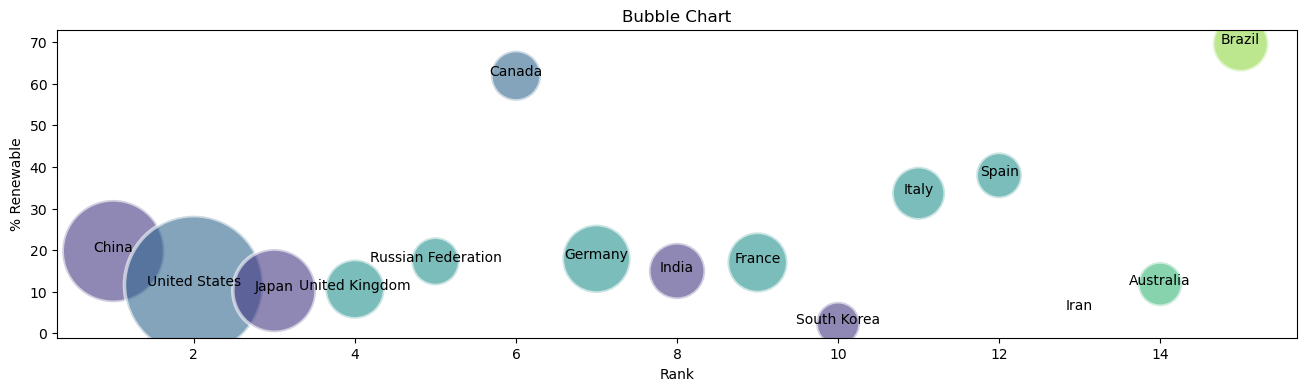

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Continent'] = df.index.map(ContinentDict)
plt.figure(figsize=(16, 4))
sns.scatterplot(data=df, x='Rank', y='% Renewable', hue='Continent', size='2015',
                sizes=(1000, 10000), legend=None, palette='viridis', alpha=0.6)
for line in range(0, df.shape[0]):
    plt.text(
        df['Rank'][line], 
        df['% Renewable'][line], 
        df.index[line], 
        horizontalalignment='center', 
        size='medium', color='black')
plt.title('Bubble Chart') #15?